#Data exploration - preprocessing

- Most of observations in UK, so making new variable named New Country, have 2 values: UK or other.
- There are 2 numeric data is Quantity and Price. However, data is so extreme in min and max. The reason is that they use 2 columns to report the refund, adjust financial reports, promotion.
- In null data in description and customerID, price <= 0 , there are  2928 observations. In these observations, quantity is too big or <0. In means that this is perhaps is refund or a kind to manage stock, so I maek  new columns named Stock, in here the observation in these conditions and OTHER 
- Price <0 have 3 observations, and they are adjust debt. That's a kind of financial report.
- price = 0 is promotion or amendent.... We can drop price = 0 when clasify description. I correct a lot mispell error in description.
- Price >=300 only have in Description FLAG OF ST GEORGE CAR FLAG so I remove this outliers.

> Indented block


- Quantity <0 is refund, there is no quantity = 0
- Null data only have in description (0.5%), and customer ID (20%). After we remove outliers in price and quantity, there are no more null value in dataset . We remove 10% outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
# For first time use, mounting data from drive
# Need sign-in authentication
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing Excel from ECS171 Shared Google Drive
# Takes a while for file to load

df = pd.read_excel('drive/Shared drives/ECS171/Dataset/online_retail_II.xlsx')

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## General anlysis for all figures

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [280]:
df['Customer ID'] = df['Customer ID'].astype('object')

In [42]:
df.describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


In quantity and price, min max is so extreme.

In [31]:
df.select_dtypes(include="object").describe()

,Invoice,StockCode,Description,Customer ID,Country
count,525461,525461,522533,417534.0,525461
unique,28816,4632,4660,4383.0,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14911.0,United Kingdom
freq,675,3516,3549,5710.0,485852


In [32]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [33]:
# Number of null Descriptions / Number of records * 100%
2928*100/525461

0.5572249891048051

It appears that 0.557% of the data is missing a Description (we don't know what was purchased).

In [34]:
# Number of null Customer ID / Number of records * 100%
107927*100/525461

20.539488182757616

It appears that 20.539% of the data is missing a Customer ID (we don't know who made the purchase). When we check where the customer ID missing, the quantity is so large and price = 0). 

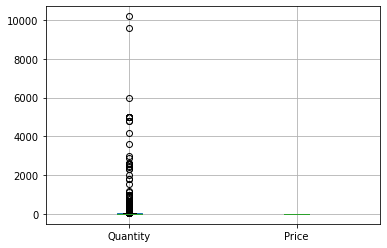

In [35]:
#nullVar = df.loc[(df['Description'].isnull()) & (df['Customer ID'].isnull()) & (df['Price']<= 0.0)
# Question: is this comment above needed? 
quantityLarge = df.loc[(df['Quantity'] > 0) & (df['Price']==0)]
quantityLarge.boxplot()

## Analysis every figures
###Price
- We just have 3 observations with price < 0. That is when adjust bad debt. This is a kind of financila report. 

In [36]:
df.loc[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


`We just have 3 observations with price < 0. That is when adjust bad debt. This is a kind of financial report.
When price <0 , description is "adjust bad debt" , after check only price <0 have description is "adjust bad debt". Invoice begin with letter A `

In [37]:
df.loc[df['Description'] == "Adjust bad debt"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
df.loc[df['Invoice'] == "^A"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [130]:
#fixing data errors
df.replace('damages','damaged',inplace=True)
df.replace('Damages','damaged',inplace=True)
df.replace('crushed','damaged',inplace=True)
df.replace('smashed','damaged',inplace=True)
df.replace('Damaged','damaged',inplace=True)
df.replace('discoloured','damaged',inplace=True)
df.replace('damages, lost bits etc','damaged',inplace=True)
df.replace('check','checked',inplace=True)
df.replace('missing (wrongly coded?)','missing',inplace=True)
df.replace('No Stock','missing',inplace=True)
df.replace('MISSING','missing',inplace=True)
df.replace('temp','?',inplace=True)
df.replace('Mailout','mailout',inplace=True)
df.replace('found','amendment',inplace=True)
df.replace('Found','amendment',inplace=True)
df.replace('wrong invc','amendment',inplace=True)
df.replace('found again','amendment',inplace=True)
df.replace('update','amendment',inplace=True)
df.replace('counted','amendment',inplace=True)
df.replace('Rust fixed','amendment',inplace=True)
df.replace('This is a test product.','amendment',inplace=True)
df.replace(' Bank Charges','Bank Charges',inplace=True)


damaged                                97
?                                      49
missing                                30
amendment                              16
checked                                11
OWL DOORSTOP                            8
POLYESTER FILLER PAD 45x45cm            7
PICNIC BASKET WICKER LARGE              7
FLAG OF ST GEORGE CAR FLAG              6
HEART OF WICKER SMALL                   6
dotcom                                  6
AIRLINE BAG VINTAGE WORLD CHAMPION      6
given away                              6
IVORY KITCHEN SCALES                    5
ENAMEL WASH BOWL CREAM                  5
PICNIC BASKET WICKER SMALL              5
POLYESTER FILLER PAD 40x40cm            5
mailout                                 5
WATERING CAN BLUE ELEPHANT              5
ENAMEL FIRE BUCKET CREAM                5
SMALL POPCORN HOLDER                    5
HEART OF WICKER LARGE                   4
GLASS JAR DAISY FRESH COTTON WOOL       4
MILK PAN PINK RETROSPOT           

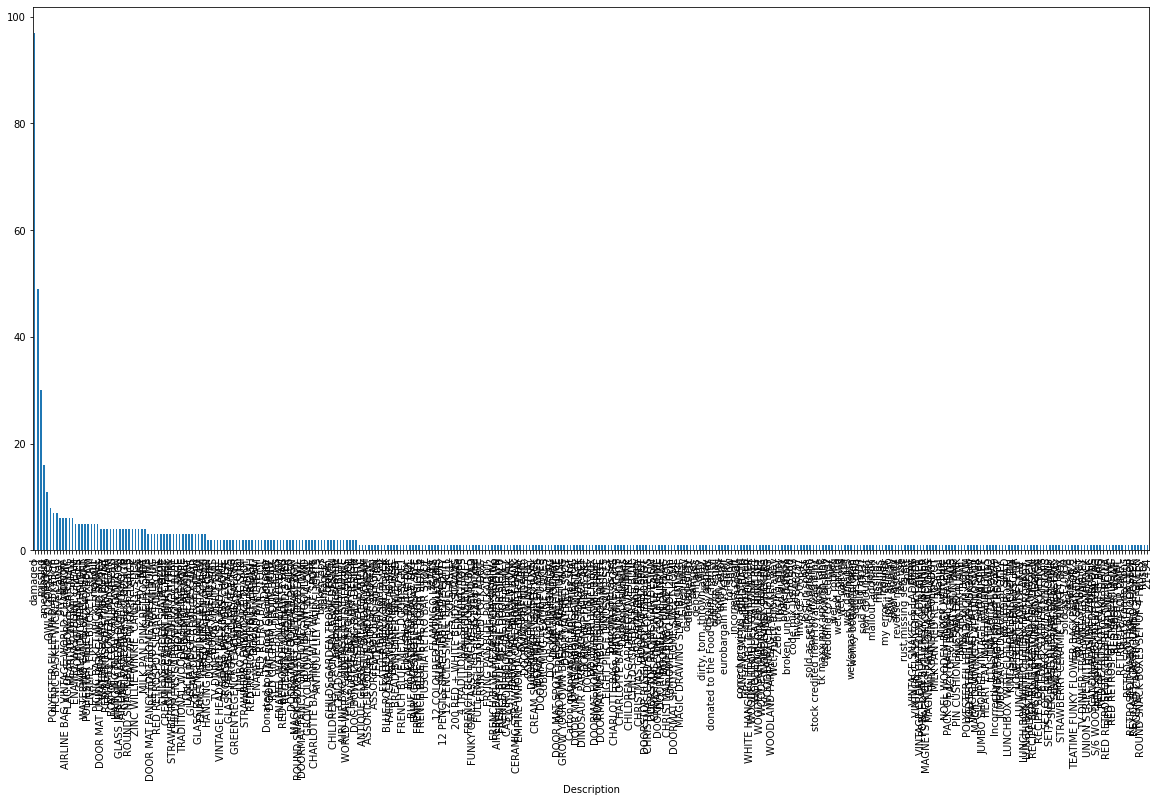

In [131]:
price0 = df.loc[(df["Price"] == 0)]
price0.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
price0['Description'].value_counts().iloc[:50]

In [112]:
dfNew = df.loc[df['Price']>0]
dfNew.describe()


,Quantity,Price
count,521771.000000,521771.000000
mean,10.768153,4.983703
std,90.821824,96.832587
min,-9360.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


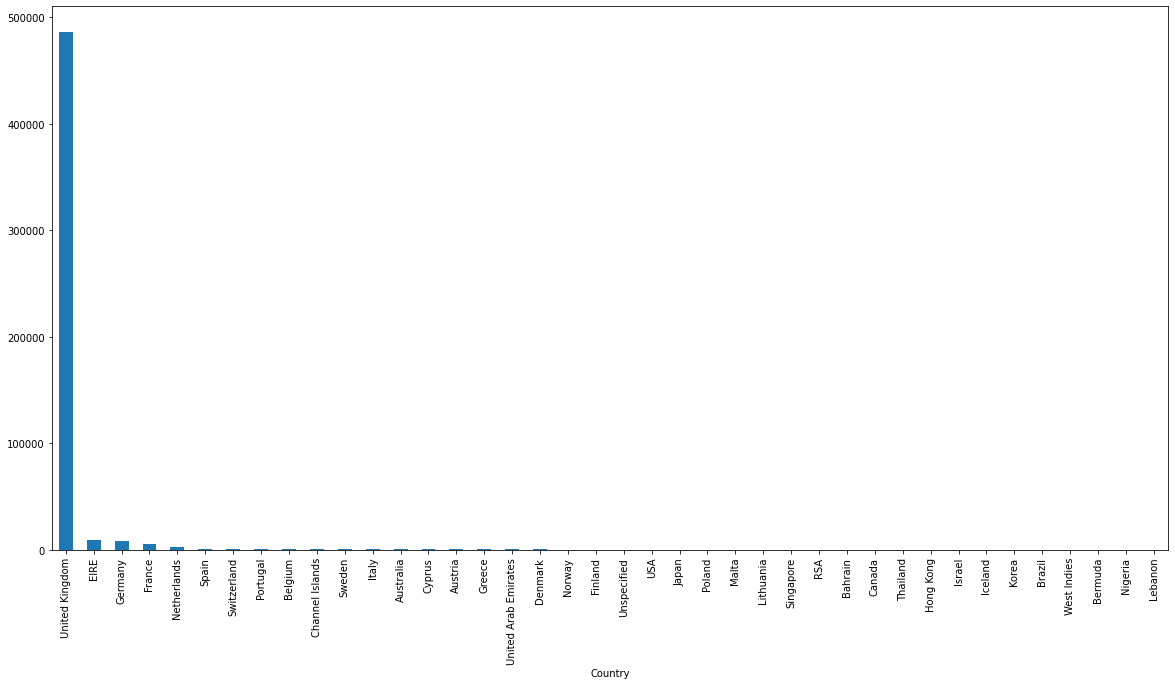

In [113]:
df.groupby('Country')['Country'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

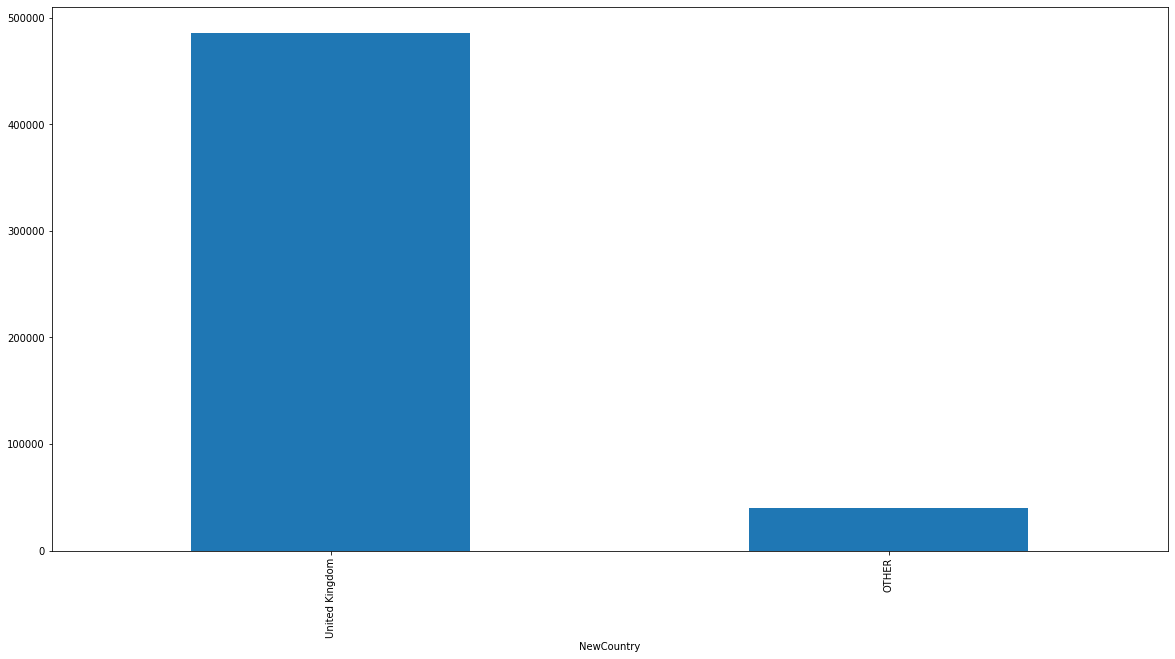

In [114]:
df['NewCountry'] = df.loc[:,'Country']
df.loc[~df['NewCountry'].isin(['United Kingdom']),'NewCountry'] = 'OTHER'
df.groupby('NewCountry')['NewCountry'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [118]:
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)&(df['Quantity'] > 0)]
dfNew.describe()

,Quantity,Price
count,473379.000000,473379.000000
mean,9.972675,4.197500
std,60.038520,63.608037
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,10000.000000,25111.090000


With the price > 50, some of them are Dotcom, Manual. they still use price columns to report financial

DOTCOM POSTAGE                         513
Manual                                 386
VINTAGE POST OFFICE CABINET             52
SET/4 WHITE RETRO STORAGE CUBES         38
POSTAGE                                 29
Bank Charges                            27
Discount                                25
VINTAGE BLUE KITCHEN CABINET            23
Adjustment by john on 26/01/2010 16     19
VINTAGE RED KITCHEN CABINET             18
SAMPLES                                 18
FRENCH STYLE WALL DRESSER               14
Adjustment by john on 26/01/2010 17     11
BLUE KASHMIRI OCCASIONAL TABLE           9
AMAZON FEE                               8
FLAG OF ST GEORGE CAR FLAG               7
GIANT SEVENTEEN DRAWER SIDEBOARD         6
REGENCY MIRROR WITH SHUTTERS             6
RUSTIC  SEVENTEEN DRAWER SIDEBOARD       6
CHEST NATURAL WOOD 20 DRAWERS            5
DECORATIVE HANGING SHELVING UNIT         5
CHALKBOARD KITCHEN ORGANISER             5
ANT WHITE SWEETHEART TABLE W 3 DRAW      4
SCHOOL DESK

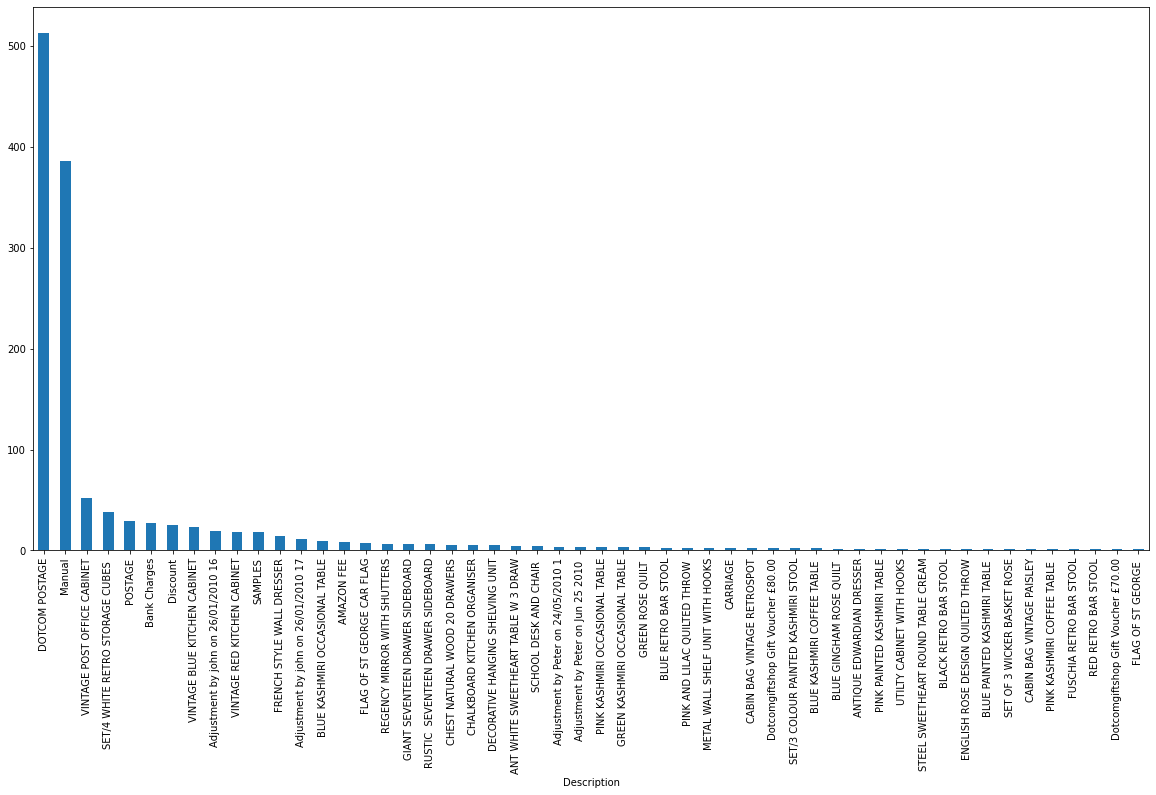

In [132]:
df.loc[df['Price']>50].groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
df.loc[df['Price']>50]['Description'].value_counts().iloc[:50]

In [220]:
# Change values in Finance
df['Finance'] = df.loc[:,'Description']
df['Finance'].replace('Adjustment by john on 26/01/2010 17','Adjust',inplace=True)
df['Finance'].replace('Adjustment by john on 26/01/2010 16','Adjust',inplace=True)
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)  
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)
df['Finance'].replace('DOTCOM POSTAGE','Partner',inplace=True)
df['Finance'].replace('POSTAGE','Partner',inplace=True)
df['Finance'].replace('ebay sales','Partner',inplace=True)
df['Finance'].replace('AMAZON FEE','Partner',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £70.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £80.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £30.00','Discount',inplace=True)
df['Finance'].replace('POSTAGE','Discount',inplace=True)
df['Finance'].replace('SAMPLES','Discount',inplace=True)


In [221]:
df.loc[~df['Finance'].isin(['Adjust','Partner','Discount','Manual']),'Finance'] = 'OTHER'


OTHER       522772
Partner       1610
Manual         854
Discount       161
Adjust          64
Name: Finance, dtype: int64

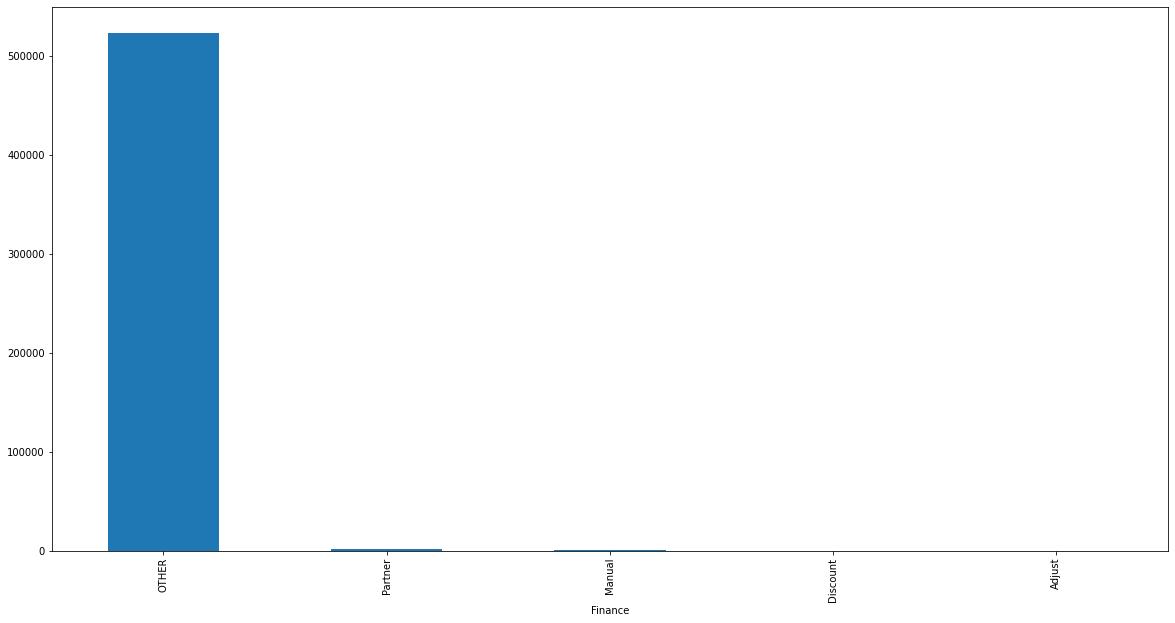

In [222]:
df.groupby('Finance')['Finance'].count().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
df['Finance'].value_counts().iloc[:20]

In [273]:
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)&(df['Quantity'] > 0) & (df['Finance'] == 'OTHER')]
dfNew.describe()

,Quantity,Price,Customer ID
count,472078.000000,472078.000000,370531.000000
mean,9.992016,3.459794,15565.451873
std,60.117730,5.229847,1593.090301
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14215.000000
50%,3.000000,2.100000,15601.000000
75%,10.000000,4.210000,16940.000000
max,10000.000000,1157.150000,18287.000000


In [274]:
dfTemp = dfNew.loc[(dfNew['Price'] >= 300)]

In [275]:
dfTemp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NewCountry,Finance
136403,502451,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-03-24 14:14:00,867.79,NaN,United Kingdom,United Kingdom,OTHER
180997,506571,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-04-30 13:04:00,408.40,NaN,United Kingdom,United Kingdom,OTHER
192196,507637,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-05-10 14:55:00,1157.15,NaN,United Kingdom,United Kingdom,OTHER
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom,United Kingdom,OTHER
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom,United Kingdom,OTHER


In [277]:
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)& (df['Price']<= 300)&(df['Quantity'] > 0) & (df['Finance'] == 'OTHER')]
dfNew.describe()

,Quantity,Price,Customer ID
count,472073.000000,472073.000000,370529.000000
mean,9.992111,3.453281,15565.443013
std,60.118041,4.706247,1593.089994
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14215.000000
50%,3.000000,2.100000,15601.000000
75%,10.000000,4.210000,16940.000000
max,10000.000000,295.000000,18287.000000


BROCADE RING PURSE                  2
PACK OF 12 PINK PAISLEY TISSUES     1
SET/6 FRUIT SALAD  PAPER PLATES     1
PACK OF 12 SKULL TISSUES            1
SET/6 FRUIT SALAD PAPER CUPS        1
POP ART PEN CASE & PENS             1
PACK OF 12 SUKI TISSUES             1
PACK OF 12 RED SPOTTY TISSUES       1
PACK OF 12 WOODLAND TISSUES         1
Name: Description, dtype: int64

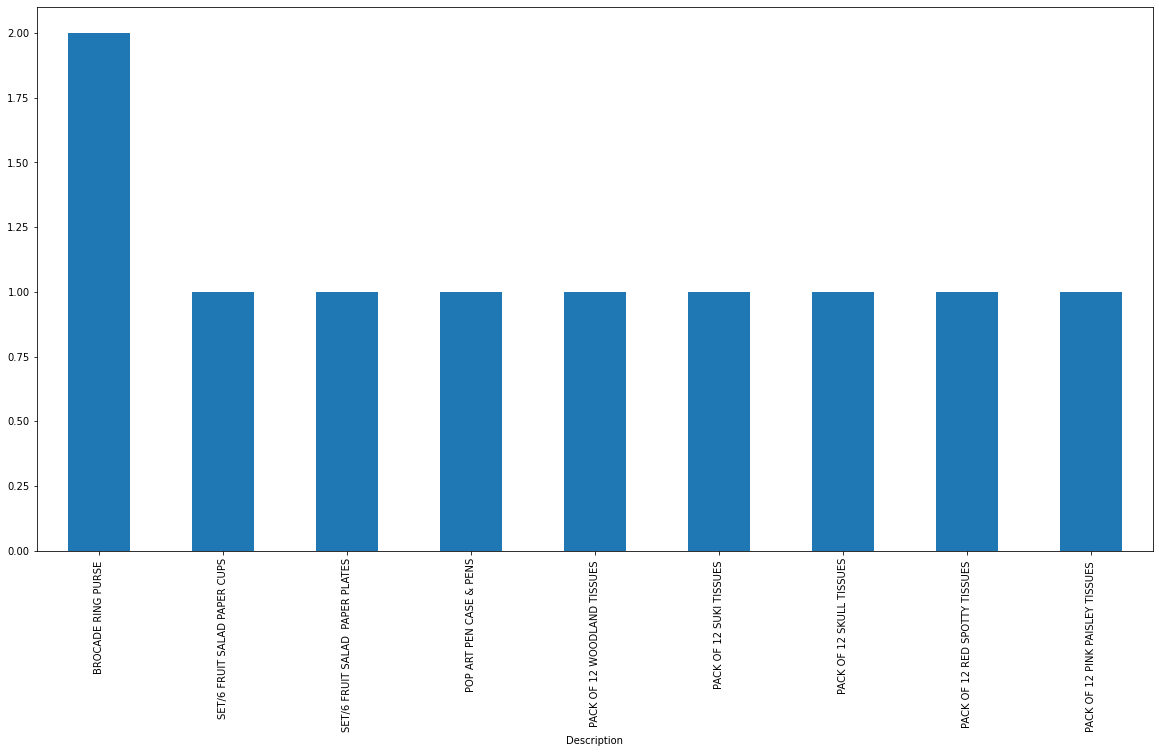

In [266]:
dfTemp = dfNew.loc[df['Price'] < 1   ]
dfTemp.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfTemp['Description'].value_counts().iloc[:50]

In [267]:
dfTemp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NewCountry,Finance
7303,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940.0,United Kingdom,United Kingdom,OTHER
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom,United Kingdom,OTHER
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom,United Kingdom,OTHER
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom,United Kingdom,OTHER
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom,United Kingdom,OTHER
326847,521315,17003,BROCADE RING PURSE,7128,2010-09-03 12:01:00,0.19,15838.0,United Kingdom,United Kingdom,OTHER
358763,524174,21096,SET/6 FRUIT SALAD PAPER PLATES,7008,2010-09-27 16:30:00,0.13,13687.0,United Kingdom,United Kingdom,OTHER
358764,524174,21088,SET/6 FRUIT SALAD PAPER CUPS,7128,2010-09-27 16:30:00,0.08,13687.0,United Kingdom,United Kingdom,OTHER
358774,524174,16047,POP ART PEN CASE & PENS,5184,2010-09-27 16:30:00,0.08,13687.0,United Kingdom,United Kingdom,OTHER
432177,530715,17003,BROCADE RING PURSE,6336,2010-11-04 11:36:00,0.19,15838.0,United Kingdom,United Kingdom,OTHER




### Analyze StockCode


In [281]:
dfNew.select_dtypes(include="object").describe()

,Invoice,StockCode,Description,Country,NewCountry,Finance
count,472073,472073,472073,472073,472073,472073
unique,19083,4230,4498,1,1,1
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,United Kingdom,OTHER
freq,674,3308,3342,472073,472073,472073


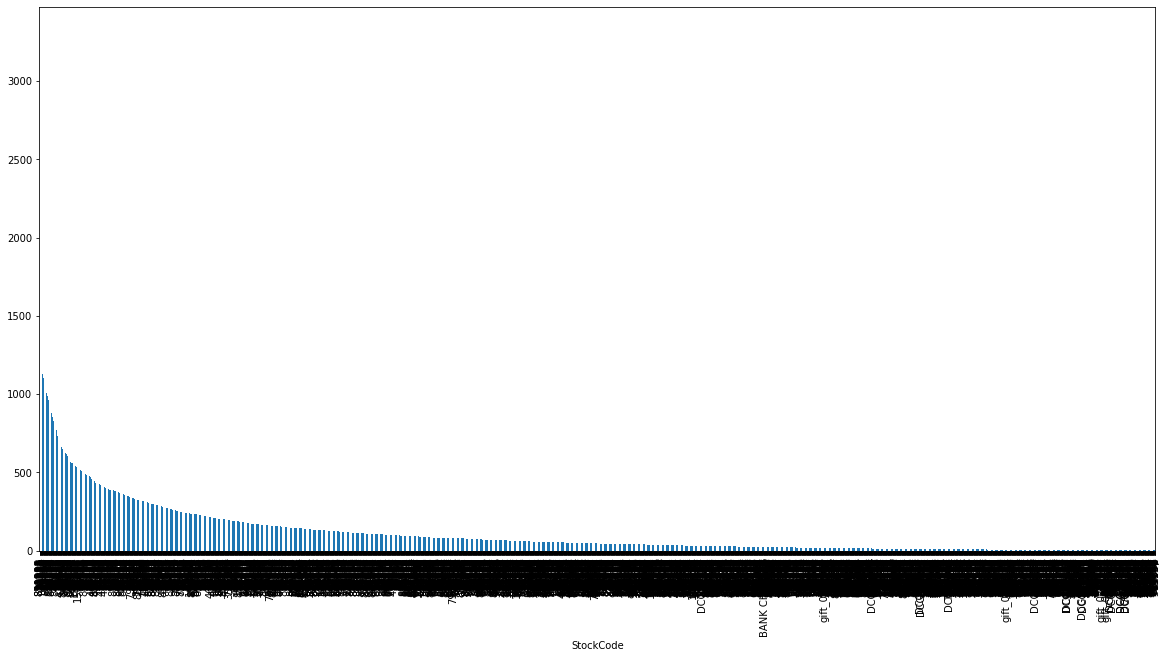

In [282]:
dfNew.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [283]:
dfNew.groupby('Description')['Description'].count().sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3342
REGENCY CAKESTAND 3 TIER              1864
STRAWBERRY CERAMIC TRINKET BOX        1615
ASSORTED COLOUR BIRD ORNAMENT         1373
HOME BUILDING BLOCK WORD              1338
                                      ... 
SCOTTIE DOGS CHILDRENS OVERALL           1
CARDHOLDER GINGHAM HEART                 1
ETCHED GLASS HEART TREE DECORATION       1
DOOR MAT BLUE FLOCK                      1
BAKING MOULD EASTER EGG MILK CHOC        1
Name: Description, Length: 4498, dtype: int64

In [292]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472073 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      472073 non-null  object        
 1   StockCode    472073 non-null  object        
 2   Description  472073 non-null  object        
 3   Quantity     472073 non-null  int64         
 4   InvoiceDate  472073 non-null  datetime64[ns]
 5   Price        472073 non-null  float64       
 6   Customer ID  370529 non-null  float64       
 7   Country      472073 non-null  object        
 8   NewCountry   472073 non-null  object        
 9   Finance      472073 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 59.6+ MB


In [294]:
(525461 - 472073)/525461


0.10160221215275729

# Data after remove outliers

In [ ]:
import pandas as pd
import numpy as np
# For first time use, mounting data from drive
# Need sign-in authentication
from google.colab import drive
drive.mount('/content/drive')
# Importing Excel from ECS171 Shared Google Drive
# Takes a while for file to load
df = pd.read_excel('drive/Shared drives/ECS171/Dataset/online_retail_II.xlsx')

In [305]:

df['Customer ID'] = df['Customer ID'].astype('object')
#replace mispell
df.replace('damages','damaged',inplace=True)
df.replace('Damages','damaged',inplace=True)
df.replace('crushed','damaged',inplace=True)
df.replace('smashed','damaged',inplace=True)
df.replace('Damaged','damaged',inplace=True)
df.replace('discoloured','damaged',inplace=True)
df.replace('damages, lost bits etc','damaged',inplace=True)
df.replace('check','checked',inplace=True)
df.replace('missing (wrongly coded?)','missing',inplace=True)
df.replace('No Stock','missing',inplace=True)
df.replace('MISSING','missing',inplace=True)
df.replace('temp','?',inplace=True)
df.replace('Mailout','mailout',inplace=True)
df.replace('found','amendment',inplace=True)
df.replace('Found','amendment',inplace=True)
df.replace('wrong invc','amendment',inplace=True)
df.replace('found again','amendment',inplace=True)
df.replace('update','amendment',inplace=True)
df.replace('counted','amendment',inplace=True)
df.replace('Rust fixed','amendment',inplace=True)
df.replace('This is a test product.','amendment',inplace=True)
df.replace(' Bank Charges','Bank Charges',inplace=True)

df['NewCountry'] = df.loc[:,'Country']
df.loc[~df['NewCountry'].isin(['United Kingdom']),'NewCountry'] = 'OTHER'

# Change values in Finance
df['Finance'] = df.loc[:,'Description']
df['Finance'].replace('Adjustment by john on 26/01/2010 17','Adjust',inplace=True)
df['Finance'].replace('Adjustment by john on 26/01/2010 16','Adjust',inplace=True)
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)  
df['Finance'].replace('Adjustment by Peter on Jun 25 2010','Adjust',inplace=True)
df['Finance'].replace('DOTCOM POSTAGE','Partner',inplace=True)
df['Finance'].replace('POSTAGE','Partner',inplace=True)
df['Finance'].replace('ebay sales','Partner',inplace=True)
df['Finance'].replace('AMAZON FEE','Partner',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £70.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £80.00','Discount',inplace=True)
df['Finance'].replace('Dotcomgiftshop Gift Voucher £30.00','Discount',inplace=True)
df['Finance'].replace('POSTAGE','Discount',inplace=True)
df['Finance'].replace('SAMPLES','Discount',inplace=True)

# Change value in Finance to make other
df.loc[~df['Finance'].isin(['Adjust','Partner','Discount','Manual']),'Finance'] = 'OTHER'

# Make New dataset after cleaning and remove 
dfNew = df.loc[(df['Country'] == 'United Kingdom')& (df['Price']>0)& (df['Price']<= 300)&(df['Quantity'] > 0) & (df['Finance'] == 'OTHER')]
dfNew['Customer ID'] = dfNew['Customer ID'].astype('object')
dfNew.info()
dfNew.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 472073 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      472073 non-null  object        
 1   StockCode    472073 non-null  object        
 2   Description  472073 non-null  object        
 3   Quantity     472073 non-null  int64         
 4   InvoiceDate  472073 non-null  datetime64[ns]
 5   Price        472073 non-null  float64       
 6   Customer ID  370529 non-null  object        
 7   Country      472073 non-null  object        
 8   Finance      472073 non-null  object        
 9   NewCountry   472073 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 39.6+ MB


,Quantity,Price
count,472073.000000,472073.000000
mean,9.992111,3.453281
std,60.118041,4.706247
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,10000.000000,295.000000


In [306]:
del dfNew['NewCountry']
del dfNew['Country']
del dfNew['Finance']

In [307]:
dfNew.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085


In [332]:
dfNew.select_dtypes(include="object").describe()

,Invoice,StockCode,Description,Customer ID
count,472073,472073,472073,370529.0
unique,19083,4230,4498,3953.0
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0
freq,674,3308,3342,5042.0


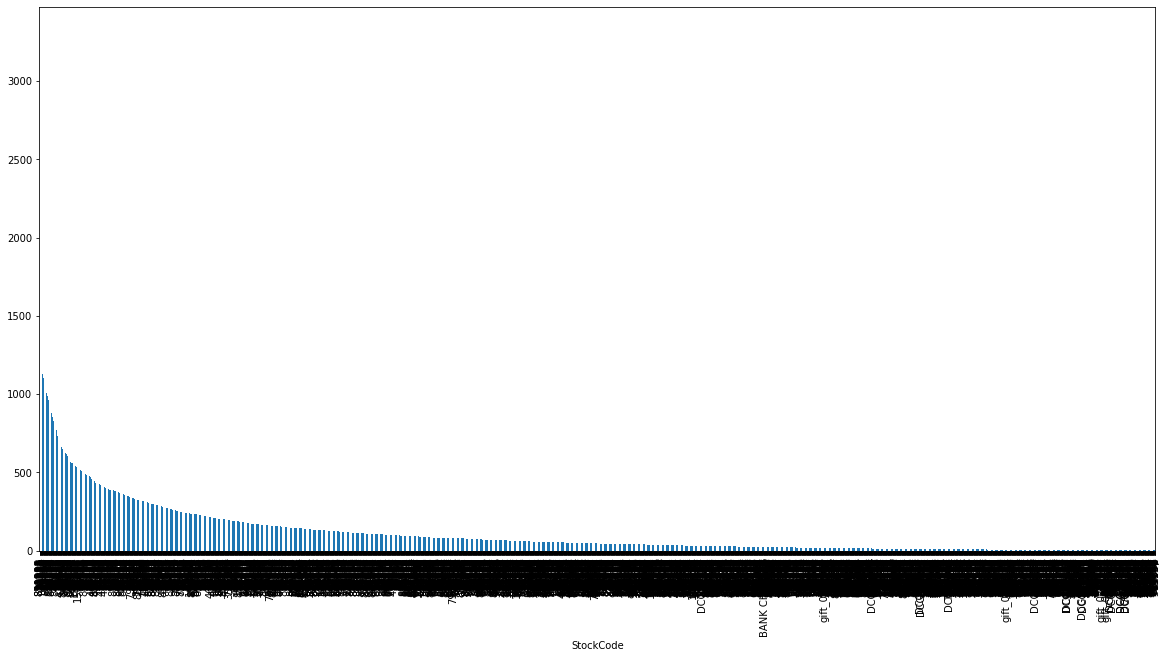

In [309]:
dfNew.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [311]:
#Top 20 stockCode
dfNew['StockCode'].value_counts().iloc[:20]

85123A    3308
85099B    1885
22423     1864
21212     1696
21232     1615
20725     1449
84879     1373
21754     1338
84991     1273
21034     1215
21931     1153
22470     1129
20727     1111
21755     1110
82494L    1110
20914     1105
22383     1094
21080     1094
21977     1079
22469     1049
Name: StockCode, dtype: int64

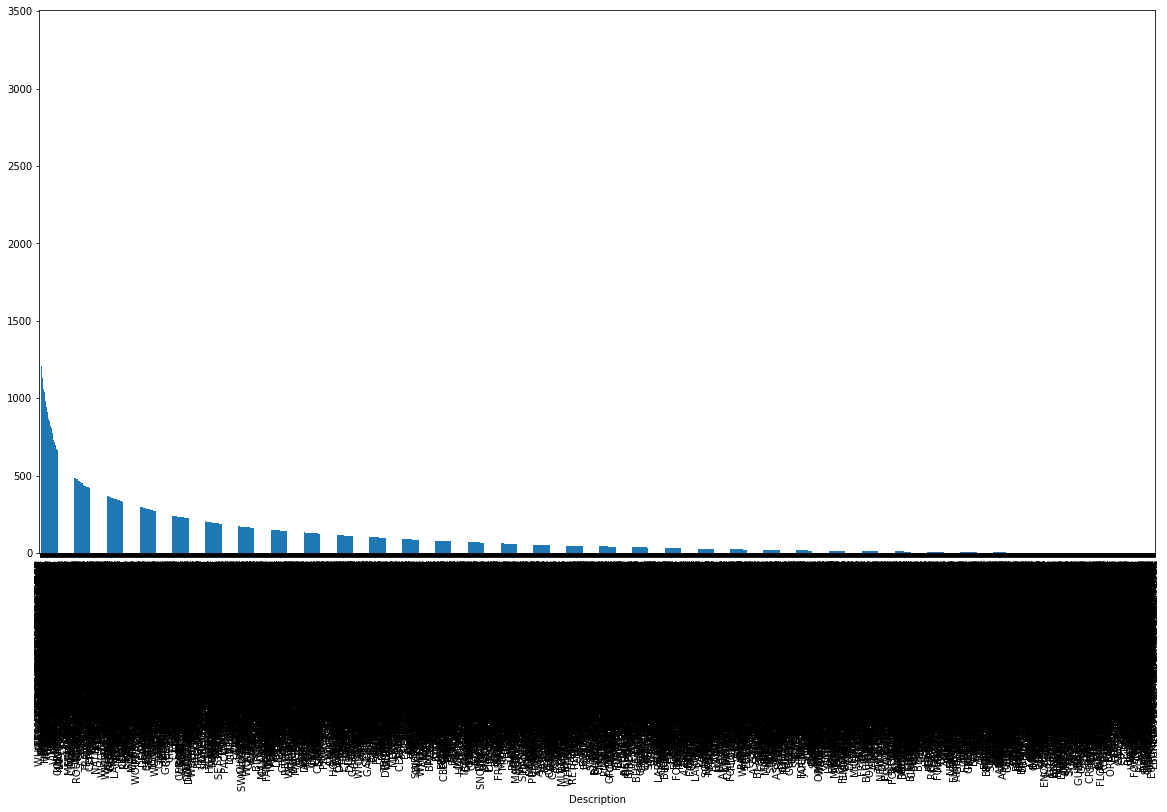

In [310]:
dfNew.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

In [312]:
#Top 20 Description
dfNew['Description'].value_counts().iloc[:20]

WHITE HANGING HEART T-LIGHT HOLDER    3342
REGENCY CAKESTAND 3 TIER              1864
STRAWBERRY CERAMIC TRINKET BOX        1615
ASSORTED COLOUR BIRD ORNAMENT         1373
HOME BUILDING BLOCK WORD              1338
PACK OF 72 RETRO SPOT CAKE CASES      1286
60 TEATIME FAIRY CAKE CASES           1273
REX CASH+CARRY JUMBO SHOPPER          1215
JUMBO BAG RED RETROSPOT               1206
JUMBO STORAGE BAG SUKI                1153
WOODEN FRAME ANTIQUE WHITE            1137
LUNCH BAG RED SPOTTY                  1132
HEART OF WICKER LARGE                 1129
LUNCH BAG  BLACK SKULL.               1111
LOVE BUILDING BLOCK WORD              1110
PACK OF 60 PINK PAISLEY CAKE CASES    1079
LUNCH BAG SUKI  DESIGN                1061
RED HANGING HEART T-LIGHT HOLDER      1049
HEART OF WICKER SMALL                 1049
JUMBO BAG STRAWBERRY                  1040
Name: Description, dtype: int64

BROCADE RING PURSE                     2
PACK OF 12 PINK PAISLEY TISSUES        1
SET/6 FRUIT SALAD  PAPER PLATES        1
ROTATING SILVER ANGELS T-LIGHT HLDR    1
PACK OF 12 SKULL TISSUES               1
SET/6 FRUIT SALAD PAPER CUPS           1
POP ART PEN CASE & PENS                1
PACK OF 12 SUKI TISSUES                1
PACK OF 12 RED SPOTTY TISSUES          1
PACK OF 12 WOODLAND TISSUES            1
Name: Description, dtype: int64

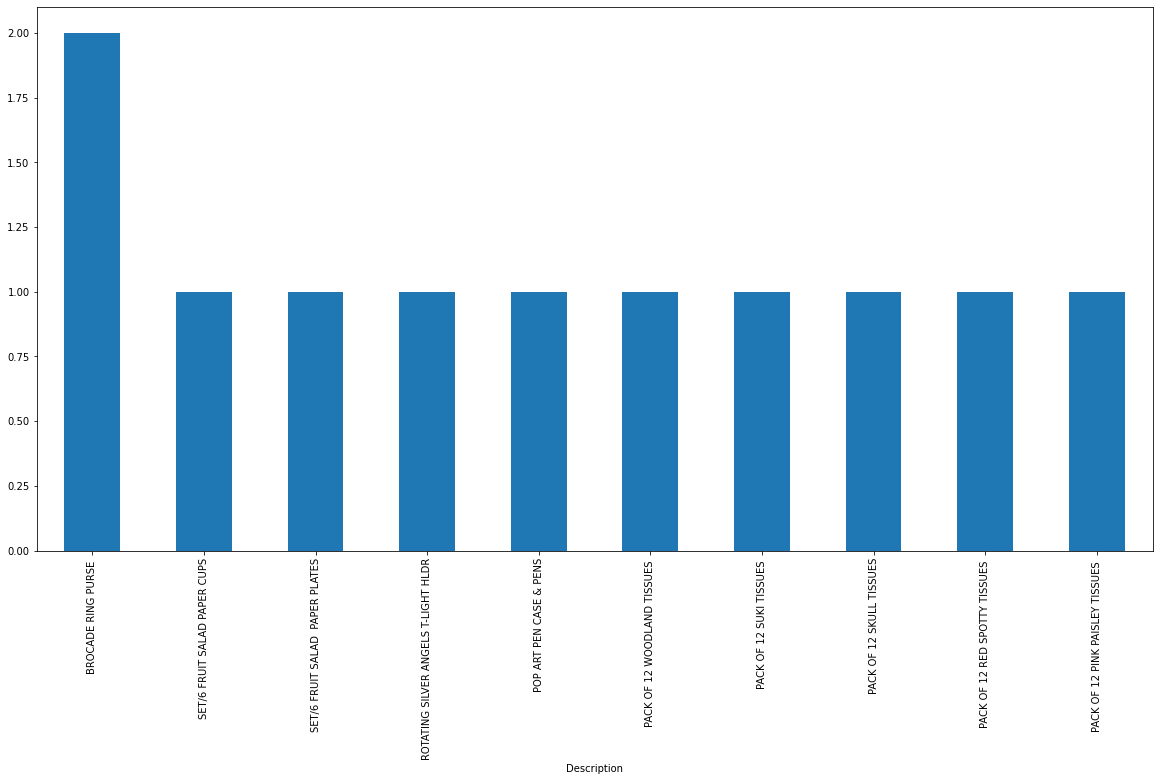

In [316]:
# Quantity > 5000
dfTempPrice = dfNew.loc[dfNew['Quantity'] >5000   ]
dfTempPrice.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfTempPrice['Description'].value_counts().iloc[:10]

In [317]:
dfTempPrice

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
7303,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940
326847,521315,17003,BROCADE RING PURSE,7128,2010-09-03 12:01:00,0.19,15838
358763,524174,21096,SET/6 FRUIT SALAD PAPER PLATES,7008,2010-09-27 16:30:00,0.13,13687
358764,524174,21088,SET/6 FRUIT SALAD PAPER CUPS,7128,2010-09-27 16:30:00,0.08,13687
358774,524174,16047,POP ART PEN CASE & PENS,5184,2010-09-27 16:30:00,0.08,13687
432176,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04 11:36:00,1.69,15838


VINTAGE BLUE KITCHEN CABINET    16
VINTAGE RED KITCHEN CABINET     16
FLAG OF ST GEORGE CAR FLAG       2
Name: Description, dtype: int64

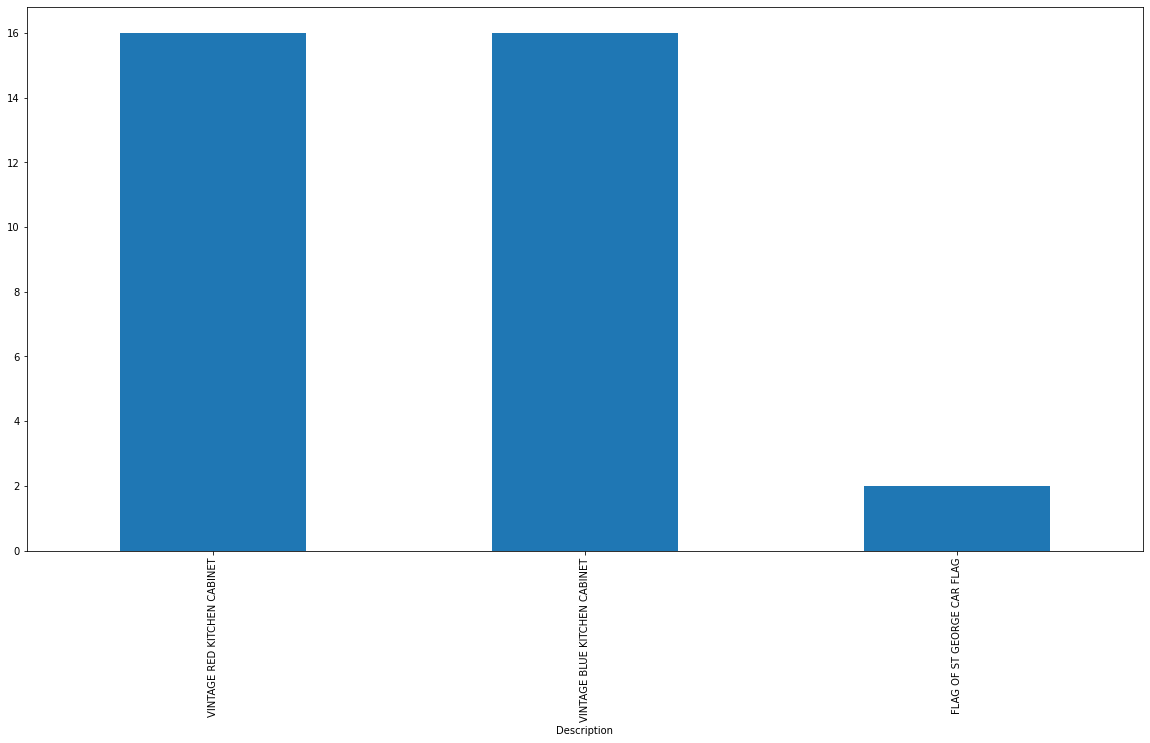

In [321]:
# 300 > Price > 200
dfTempPrice = dfNew.loc[dfNew['Price'] >200   ]
dfTempPrice.groupby('Description')['Description'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfTempPrice['Description'].value_counts().iloc[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


17841.0    5042
14606.0    3861
12748.0    2614
17850.0    2499
16549.0    2269
15311.0    2052
14527.0    1726
16782.0    1693
13089.0    1544
17377.0    1357
Name: Customer ID, dtype: int64

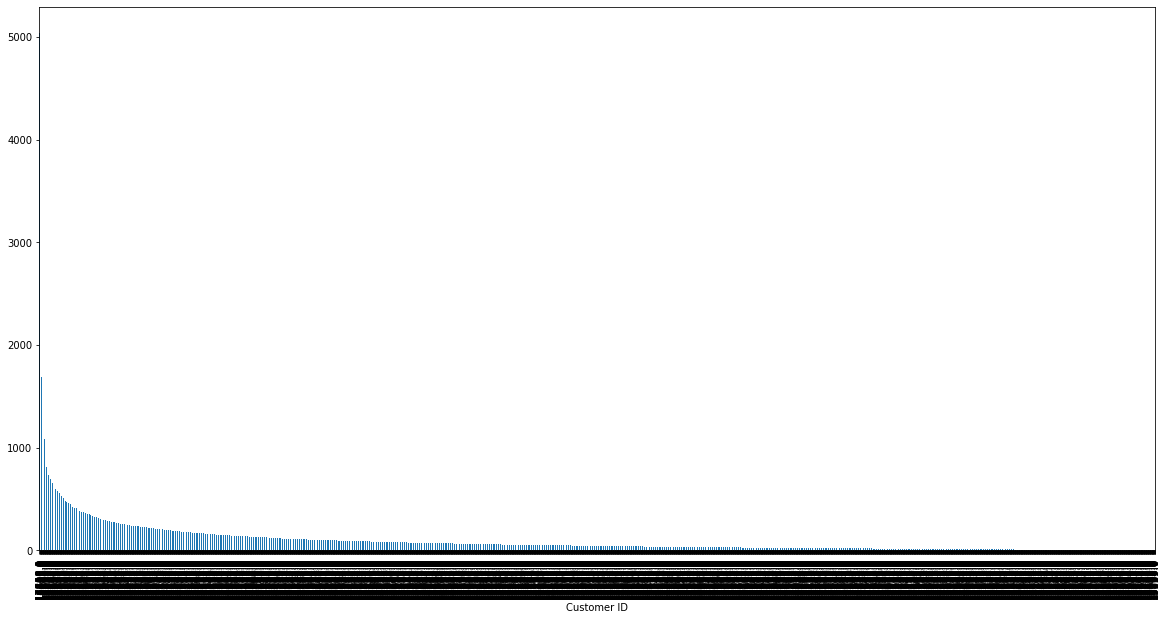

In [333]:
# Quantity > 5000
#dfTempPrice = dfNew.loc[dfNew['Customer ID'] >5000   ]
dfNew['Customer ID'] = dfNew['Customer ID'].astype('object')
dfNew.groupby('Customer ID')['Customer ID'].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
dfNew['Customer ID'].value_counts().iloc[:10]

In [334]:
dfNew.loc[df['Customer ID' == '17841']]

KeyError: ignored